In [1]:
import pathlib
import importlib.resources
import numpy as np
import matplotlib.pyplot as plt
import vortexfitting.schemes as vfSchemes
import vortexfitting.fitting as vfFitting
import vortexfitting.detection as vfDetection
import vortexfitting.output as vfOutput
from netCDF4 import Dataset
from pivpy import io, graphics, inter 

C:\Users\guyro\Desktop\UNI TAU\3RD YEAR\A\RESEARCH PROJECT\Vortex detection\Vortex findinf\.venv\Lib\site-packages\pivpy\io.py:19: UserWarning: lvreader is not installed, use pip install lvpyio
  warnings.warn("lvreader is not installed, use pip install lvpyio")


In [2]:
#This cell is used to signify the path to the .vec files gathered from the piv files in the lab
#"contents" is the content of the directory "vec map" which is where the vector maps are
import os

# Path to the directory
path = r"C:\Users\guyro\Desktop\UNI TAU\3RD YEAR\A\RESEARCH PROJECT\Vortex detection\Vortex findinf\VEC MAP"

# List the contents using the os.listdir() function
contents = os.listdir(path)

# Print the contents
print(contents)

['data.nc', 'interTest', 'NetCFD_Files', 'run1_210824_002000.T000.D000.P000.H000.L.vec', 'run1_210824_002001.T000.D000.P000.H000.L.vec', 'run1_210824_002002.T000.D000.P000.H000.L.vec', 'run1_210824_002003.T000.D000.P000.H000.L.vec', 'run1_210824_002004.T000.D000.P000.H000.L.vec', 'run1_210824_002005.T000.D000.P000.H000.L.vec', 'run1_210824_002006.T000.D000.P000.H000.L.vec', 'run1_210824_002007.T000.D000.P000.H000.L.vec', 'run1_210824_002008.T000.D000.P000.H000.L.vec', 'run1_210824_002009.T000.D000.P000.H000.L.vec', 'run1_210824_002010.T000.D000.P000.H000.L.vec', 'run1_210824_002011.T000.D000.P000.H000.L.vec', 'run1_210824_002012.T000.D000.P000.H000.L.vec', 'run1_210824_002013.T000.D000.P000.H000.L.vec', 'run1_210824_002014.T000.D000.P000.H000.L.vec', 'run1_210824_002015.T000.D000.P000.H000.L.vec', 'run1_210824_002016.T000.D000.P000.H000.L.vec', 'run1_210824_002017.T000.D000.P000.H000.L.vec', 'run1_210824_002018.T000.D000.P000.H000.L.vec', 'run1_210824_002019.T000.D000.P000.H000.L.vec',

In [3]:
# For Python 3.9+
"""This line converts the path from a regular string into a special object of type Path from the pathlib module. This object provides methods for working with paths more efficiently.
Why do this?
Strings are just text, but a Path object is designed to understand things like whether the path is a file or directory, if it exists, and how to join paths properly (depending on your operating system)."""

path = r"C:\Users\guyro\Desktop\UNI TAU\3RD YEAR\A\RESEARCH PROJECT\Vortex detection\Vortex findinf\VEC MAP"
# Convert to pathlib.Path if not already
path = pathlib.Path(path)
#path.exists() is a method that checks if the path stored in the path variable exists on your computer. "assert" will be true if the path is indeed in the computer. if assert is false it will raise "AssertionError" which means the path isnt on the computer
assert path.exists()


In [4]:
"""The code reads all the VEC files in the specified directory (path) using a function from PIVPy’s io module called load_directory. It loads the data into a special format (xarray) used for PIV analysis"""
# read VEC files into PIVPy structure (xarray)
d = io.load_directory(path) # maybe a bit long, see also how to read a single VEC file
# https://github.com/alexlib/pivpy/blob/master/examples/notebooks/test_reading_different_files.ipynb

found 900 files


In [5]:
"""Xarray stores multi-dimensional data with labeled axes(3D table with x,y,t axises) like a grid of velocity values in a PIV experiment.
d.head() gives you a preview of the first few rows (or data points) of the dataset, showing the values of velocity components (u, v) at different time steps and grid points"""
d.head()

<xarray.Dataset> Size: 3kB
Dimensions:  (x: 5, y: 5, t: 5)
Coordinates:
  * x        (x) float64 40B 16.0 32.0 48.0 64.0 80.0
  * y        (y) float64 40B 2.695e+03 2.679e+03 2.663e+03 2.647e+03 2.631e+03
  * t        (t) int64 40B 0 1 2 3 4
Data variables:
    u        (x, y, t) float64 1kB 0.0 0.0 -0.5286 ... -0.5519 0.1465 -0.03381
    v        (x, y, t) float64 1kB -0.0 -0.0 0.6017 ... 0.6274 0.5768 -0.4429
    chc      (x, y, t) float64 1kB -3.0 -1.0 4.0 4.0 4.0 ... -1.0 4.0 4.0 4.0
Attributes: (2)

In [6]:
#This method is used to save your xarray dataset to a NetCDF file. NetCDF (Network Common Data Form) is a file format commonly used for storing large, multi-dimensional data (like climate data, PIV data, etc.).
"""Takes the xarray dataset d.
Saves this dataset to a file in NetCDF format.
The file is saved to the location specified by combining path and 'data.nc'."""

d.to_netcdf(path / 'data.nc')


In [7]:
# Create an OpenPIV .txt file with velocity field (interTest.txt), put it into a folder and specify the path to it:
# openpivTxtTestFile = path / "openpiv_txt" / "interTest.txt" 
# Think up a name for the future NetCDF file (which is created as an itermediate file as described above),
# think where it will be located and create such a path. To be totally clear: the NetCDF file
# testInterCreates_nc.nc does not exist yet. We have just created a name for it.
saveToDir = path / "interTest"
if not saveToDir.exists():
    saveToDir.mkdir()
    
saveNcFile  = path / "interTest" / "testInterCreates_nc.nc"
# File with vortices created by VortexFitting:
saveVortexFile = path / "interTest" / "vortices.dat"
# Directory to save the plots to:

In [8]:
# Create an OpenPIV .txt file with velocity field (interTest.txt), put it into a folder and specify the path to it:
# openpivTxtTestFile = path / "openpiv_txt" / "interTest.txt" 
# Think up a name for the future NetCDF file (which is created as an itermediate file as described above),
# think where it will be located and create such a path. To be totally clear: the NetCDF file
# testInterCreates_nc.nc does not exist yet. We have just created a name for it.

#Opens a subdirectory in the directory path points to.To this subdirectory i will save the NetCFD files later
saveToDir = path / "NetCFD_Files" 

if not saveToDir.exists(): #This checks if the interTest directory already exists.
    saveToDir.mkdir() #If the directory does not exist, this line creates it.

#path: Base directory.
#"NetCFD_Files": Subdirectory.
#"testInterCreates_nc.nc": The name of the NetCDF file    
saveNcFile  = path / "NetCFD_Files" / "NetCFD_data.nc"

#This variable holds the path for a file where vortex data will be saved.
saveVortexFile = path / "NetCFD_Files" / "vortices.dat"
# Directory to save the plots to:

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 't = 502 [frame]'}, xlabel='x (pix)', ylabel='y (pix)'>)

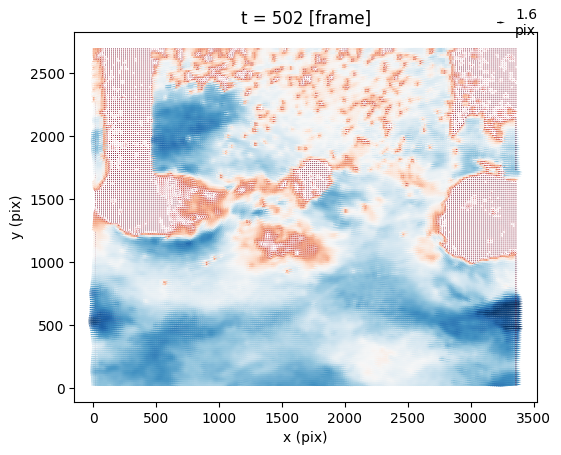

In [9]:
"""d.isel(t=0).piv.quiver() does the following:

Selects Data: d.isel(t=0) takes your xarray dataset and selects the data from the first time step (t=0).
t=0 is the first vector map in the directory. t=100 will be the 1 hundreth map in the directory

Accesses PIV Data: .piv accesses the PIV analysis results within the selected data.

Generates Plot: .quiver() creates a quiver plot to visually represent the velocity vectors (or other vector fields) from the PIV data at the selected time step."""

from pivpy import pivpy 
d.isel(t=502).piv.quiver()



In [10]:
#d.isel(t=504).piv.quiver()

In [11]:
#d.isel(t=505).piv.quiver()

In [12]:
# test on 5 first maps:
#We will test if we are able to save selected data from d(xarray) to a new format(NetCFD)
#vfField = inter.pivpyTOvf(d.isel(t=slice(500,510)), saveNcFile)
vfField = inter.pivpyTOvf(d.isel(t=slice(500)), saveNcFile)
"""
d.isel(t=slice(0,4)): Selects data from the first 4 time steps of your dataset.
inter.pivpyTOvf(d.isel(t=slice(0,4)), saveNcFile): Converts the selected data into another format or structure using the pivpyTOvf() function and saves intermediate results to saveNcFile.
vfField: Stores the result of this conversion"""

'\nd.isel(t=slice(0,4)): Selects data from the first 4 time steps of your dataset.\ninter.pivpyTOvf(d.isel(t=slice(0,4)), saveNcFile): Converts the selected data into another format or structure using the pivpyTOvf() function and saves intermediate results to saveNcFile.\nvfField: Stores the result of this conversion'

In [13]:
# As mentioned before, conversion of the PIVPY object to the VortexFitting object yields an auxiliary 
# NetCDF4 file. It is left to the user to decide what to do with the file. Just in case, this is a
# brief example of how to work with a NetCDF4 file.
# First, read the file:
nc = Dataset(str(saveNcFile))
#Opens the NetCDF file specified by saveNcFile and assigns it to nc, so you can access the data inside the file

# Second, access its data:
print("nc['grid_n']:\n{}".format(nc['grid_n'][:])) # the name of x coordinate in the VortexFitting class
print("\nnc['grid_z']:\n{}".format(nc['grid_z'][:])) # the name of y coordinate in the VortexFitting class
print("\nnc['velocity_n']:\n{}".format(nc['velocity_n'][:])) # the name of u velocity component in the VortexFitting class
print("\nnc['velocity_s']:\n{}".format(nc['velocity_s'][:])) # the name of v velocity component in the VortexFitting class
print("\nx coordinate nc-file shape: {}".format(nc['grid_n'].shape))
print("y coordinate nc-file shape: {}".format(nc['grid_z'].shape))
print("u velocity component nc-file shape: {}".format(nc['velocity_n'].shape))
print("v velocity component nc-file shape: {}".format(nc['velocity_s'].shape))

nc['grid_n']:
[  16.   32.   48.   64.   80.   96.  112.  128.  144.  160.  176.  192.
  208.  224.  240.  256.  272.  288.  304.  320.  336.  352.  368.  384.
  400.  416.  432.  448.  464.  480.  496.  512.  528.  544.  560.  576.
  592.  608.  624.  640.  656.  672.  688.  704.  720.  736.  752.  768.
  784.  800.  816.  832.  848.  864.  880.  896.  912.  928.  944.  960.
  976.  992. 1008. 1024. 1040. 1056. 1072. 1088. 1104. 1120. 1136. 1152.
 1168. 1184. 1200. 1216. 1232. 1248. 1264. 1280. 1296. 1312. 1328. 1344.
 1360. 1376. 1392. 1408. 1424. 1440. 1456. 1472. 1488. 1504. 1520. 1536.
 1552. 1568. 1584. 1600. 1616. 1632. 1648. 1664. 1680. 1696. 1712. 1728.
 1744. 1760. 1776. 1792. 1808. 1824. 1840. 1856. 1872. 1888. 1904. 1920.
 1936. 1952. 1968. 1984. 2000. 2016. 2032. 2048. 2064. 2080. 2096. 2112.
 2128. 2144. 2160. 2176. 2192. 2208. 2224. 2240. 2256. 2272. 2288. 2304.
 2320. 2336. 2352. 2368. 2384. 2400. 2416. 2432. 2448. 2464. 2480. 2496.
 2512. 2528. 2544. 2560. 2576. 2592. 

In [14]:
#This code is caculating vorticity specifically for vortecies detection, but can be used to plot vorticity field as well.
"""The codetakes in the velocity field and returns a dictionary. This dictionary contains several components, including:
dvdx: The rate of change of the y-velocity with respect to the x-direction.
dudy: The rate of change of the x-velocity with respect to the y-direction."""
vfFieldDerivative = vfSchemes.fourth_order_diff(vfField) #takes in the velocity field and returns a dictionary
vorticity = vfFieldDerivative['dvdx'] - vfFieldDerivative['dudy'] #vorticity is a 2D array with vorticity value at each point

#print("Vorticity={}".format(vorticity)) #Plotting the vorticity array

max_vorticity = np.max(vorticity) #Finding max vorticity for intuation for sst(threshhold
print("Maximum vorticity: {}".format(max_vorticity))

Difference scheme: Fourth Order Scheme
Maximum vorticity: 0.6573980082837301


In [15]:
""" VortexFitting package offers 3 vortex detection methods (for the theoretical basis, see their 
 documentation at https://guilindner.github.io/VortexFitting/methodology.html). They are: Q criterion,
 Delta criterion and Swirling strength criterion. They are represented by the corresponding functions
 calc_q_criterion(vfield), calc_delta_criterion(vfield) and calc_swirling(vfield) located in the 
 module detection.py of VortexFitting package. Their usage is exactly the same. 
 I'm going to use of the Q criterion"""


#vfField :This is the velocity field of the fluid, where the vortices are detected.

#calc_q_criterion(vfField): This function applies the Q criterion to the velocity field to detect vortices. The Q criterion helps identify regions of swirling flow.

#vortexDetect: The result of the vortex detection
vortexDetect = vfDetection.calc_q_criterion(vfField) 

sst = 0.001 # This is a threshold for swirling strength, a measure of how much the fluid is swirling. Vortices below this threshold won't be considered.

bs = 3 #Box size—an integer distance used to separate vortices in the mesh/grid. It helps avoid overlapping vortices.

#This function looks at the swirling regions (detected by the Q criterion) and identifies the peaks or centers of vortices based on the swirling strength threshold and box size.
#peaks: A list of points where the swirls are strongest, indicating potential vortex centers.
peaks = vfFitting.find_peaks(vortexDetect, sst, bs) # detect the peaks of the swirls

#This line prints the number of vortices detected by counting the number of peaks found in the peaks list.
print('Vortices found: ', len(peaks[0]))

Detection method: Q criterion
Vortices found:  45


In [16]:
"""This function analyzes the vorticity (rotation of fluid) and the detected peaks to classify vortices as either clockwise or counterclockwise rotating.
* vortices_counterclockwise: Stores vortices rotating counterclockwise
* vortices_clockwise: Stores vortices rotating clockwise"""

vortices_counterclockwise, vortices_clockwise = vfFitting.direction_rotation(vorticity, peaks) 

In [17]:

rmax = 200 # initial guess of the vortex radius
ch = 0.001 # correlation threshold - a parameter used in get_vortices() function; reduce it if the vortex is too big. Higher values make the detection stricter.

vortices = vfFitting.get_vortices(vfField, peaks, vorticity, rmax, ch) #filters out noise and refines the detected vortices based on the peaks, vorticity, radius guess, and correlation threshold.

print('---- Accepted vortices ----')
print(len(vortices))

0 Processing detected swirling at (x, y) 23 11
Accepted! Correlation = 0.03 (vortex # 0)
1 Processing detected swirling at (x, y) 21 12
Accepted! Correlation = 0.06 (vortex # 1)
2 Processing detected swirling at (x, y) 23 13
Accepted! Correlation = 0.01 (vortex # 2)
3 Processing detected swirling at (x, y) 124 16
4 Processing detected swirling at (x, y) 207 17
Accepted! Correlation = 0.08 (vortex # 3)
5 Processing detected swirling at (x, y) 10 22
Accepted! Correlation = 0.04 (vortex # 4)
6 Processing detected swirling at (x, y) 36 30
Accepted! Correlation = 0.08 (vortex # 5)
7 Processing detected swirling at (x, y) 36 32
Accepted! Correlation = 0.10 (vortex # 6)
8 Processing detected swirling at (x, y) 37 38
Accepted! Correlation = 0.06 (vortex # 7)
9 Processing detected swirling at (x, y) 23 40
Accepted! Correlation = 0.04 (vortex # 8)
10 Processing detected swirling at (x, y) 26 44
Accepted! Correlation = 0.05 (vortex # 9)
11 Processing detected swirling at (x, y) 14 46
Accepted! Co

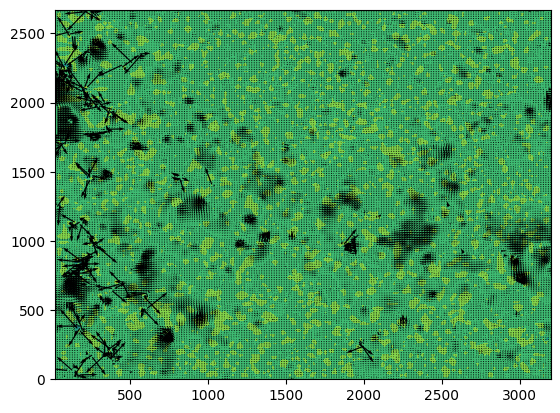

In [18]:
"""Plots arrows (a quiver plot) representing the velocity field (u_data, v_data) along with the detected vortices"""
# Plot the detected vorticies imposed on the field of the fluctuating velocities.
x_index, y_index, u_data, v_data = vfFitting.window(vfField, 0, 0, rmax)
vfFitting.plot_quiver(x_index, y_index, u_data, v_data, vortexDetect)

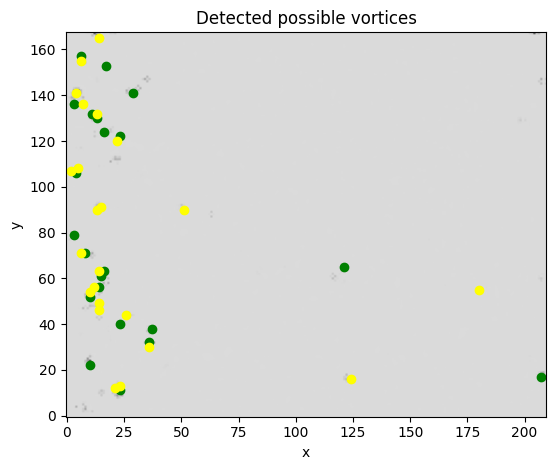

In [19]:
# Plot location and rotation of the vortices.
# The function plot_detect() uses plt.imshow() under the hood, which, again, means that
# every one of our interrogation windows is presented as a pixel.
vfFitting.plot_detect(vortices_counterclockwise, vortices_clockwise, vortexDetect, 0) # 0 flag means don't invert X and Y axes for plotting; 1 flag does the opposite

In [20]:
# Plot and create an output file with identified vortices.
# Note, that the function create() from the module output.py of VortexFitting package 
# cannot be used because it requires arguments from the console. Instead, just implement this 
# function here:

"""
saveVortexFile.open("w"): Opens a file (previously defined) to write vortex data. The file is opened in "write" mode ("w"), meaning any existing data will be overwritten.
The outfile.write(...) lines write the characteristics of each detected vortex (e.g., radius, center, rotation direction) to the file in a specific format.
"""

with saveVortexFile.open("w") as outfile:
    outfile.write("TITLE=\"Vortex characteristics evolution\"\n")
    outfile.write("Variables=\"time\",\"radius\",\"gamma\",\"xcenter\",\"ycenter\","
                  "\"u_advection\",\"v_advection\",\"correlation\",\"vtheta\"\n")
    outfile.write("DATASETAUXDATA Detection_method=\"{}\"\n".format("Q criterion"))
    outfile.write("DATASETAUXDATA Scheme=\"{}\"\n".format('fourth order')) # see the cell where we calculated vorticity
    outfile.write("DATASETAUXDATA Box_size=\"{}\"\n".format(bs))
    outfile.write("DATASETAUXDATA Detection_threshold=\"{}\"\n".format(sst))
    outfile.write("DATASETAUXDATA Rmax=\"{}\"\n".format(rmax))
    outfile.write("DATASETAUXDATA Correlation_threshold=\"{}\"\n".format(ch))
    outfile.write("DATASETAUXDATA Mean_file=\"{}\"\n".format("mean field subtracted"))
    outfile.write("DATASETAUXDATA File_type=\"{}\"\n".format('piv_netcdf'))
    outfile.write("ZONE T=\"0\", SOLUTIONTIME=0\n")

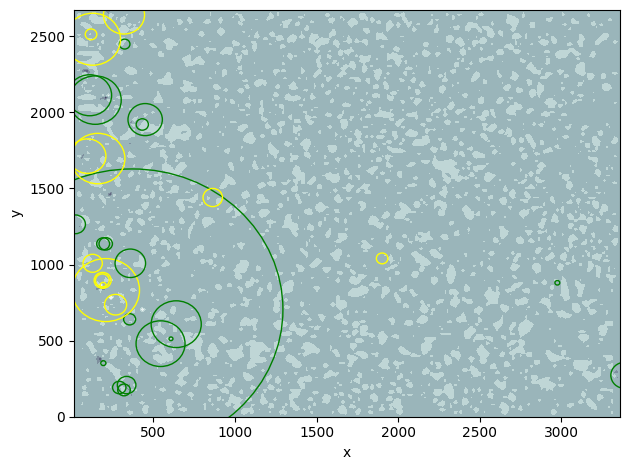

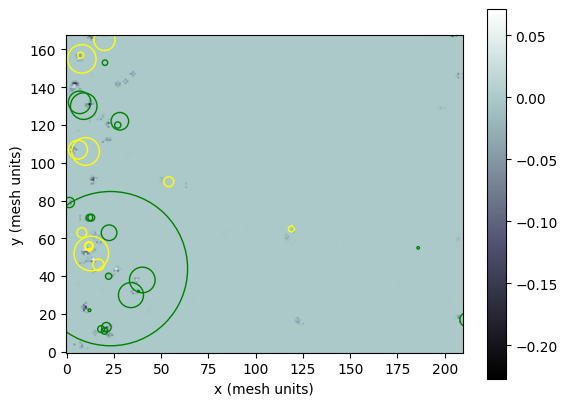

In [21]:
# Plot accepted vortices.
# The function plot_accepted() yields two plots: accepted vortices as contours and accpeted vortices
# as plt.imshow(). Pay attention, that plt.imshow() treats every interrogation window as 1 pixel.
vfFitting.plot_accepted(vfField, vortices, vortexDetect, str(saveToDir), 0, 'png') # the argument 0 refers to the time step

In [22]:

# Add vorticies information to the output file:
vfOutput.write(vortices, str(saveToDir), 0) # the argument 0 refers to the time step

# Let's see if the files were created:
print("All the files in the saving directory saveToDir:")

"""iterdir(): Lists all files in the saveToDir directory.
print(path.name): Prints the names of the files in the directory, allowing you to see what output files were created (e.g., images and vortex data)"""
for path in saveToDir.iterdir(): print(path.name) # You will see the files accepted_0.png and 
                                                  # accepted_0.svg which are the plots of the accepted vortices;
                                                  # files linked_0.svg and meshed_0.png which are the plots of
                                                  # the detected vortices; the file vortices.dat contains
                                                  # vortices data (i.e., it's an analog of OpenPIV .txt file)

All the files in the saving directory saveToDir:
accepted_0.png
accepted_0.svg
linked_0.svg
meshed_0.png
NetCFD_data.nc
vortices.dat
